In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Gwenn\Anaconda3\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


In [2]:
df=pd.read_csv('Desktop/Admission_Predict_Ver1.1.csv')

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial No.           500 non-null int64
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(5)
memory usage: 35.2 KB


In [6]:
df.keys()

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [7]:
df=df.rename(columns={'LOR ':'LOR','Chance of Admit ':'Chance of Admit'})

In [8]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


C:\Users\Gwenn\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


The average Chance of admit is 0.7217399999999996


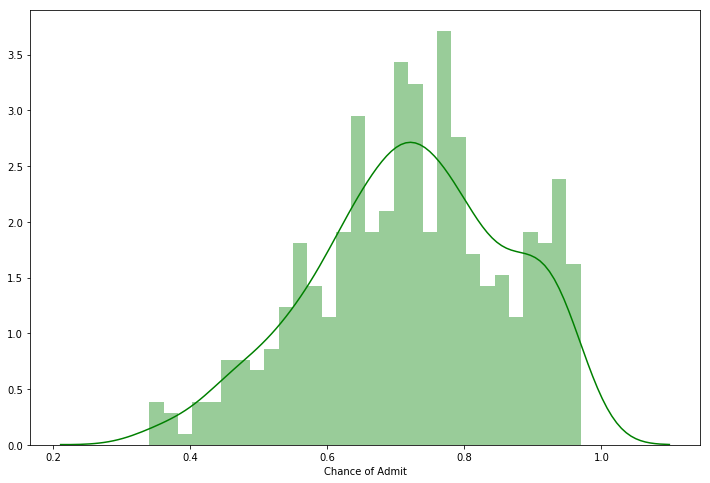

In [9]:
plt.figure(figsize=(12,8))
sns.distplot(df['Chance of Admit'],color='g',bins=30)
print('The average Chance of admit is',df['Chance of Admit'].mean())

The research split
 1    0.56
0    0.44
Name: Research, dtype: float64


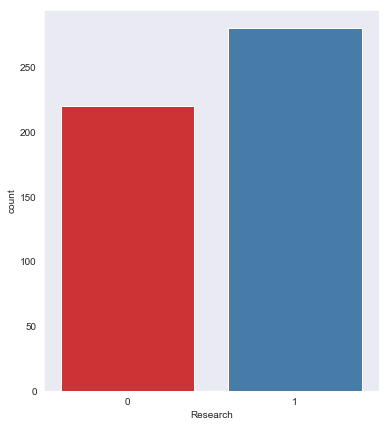

In [10]:
sns.set_style('dark')
plt.figure(figsize=(6,7))
sns.countplot(df['Research'],palette='Set1')
print('The research split' '\n',df['Research'].value_counts(normalize=True))

C:\Users\Gwenn\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


The average TOEFL Score is 107.192


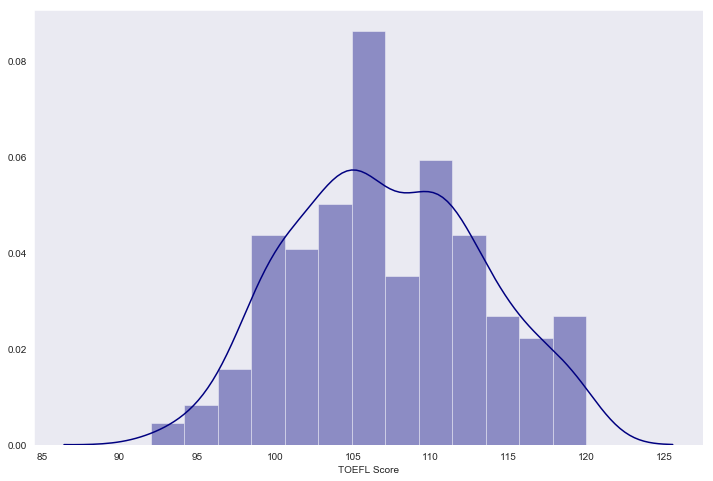

In [11]:
plt.figure(figsize=(12,8))
sns.distplot(df['TOEFL Score'],color='navy')
print('The average TOEFL Score is',df['TOEFL Score'].mean())

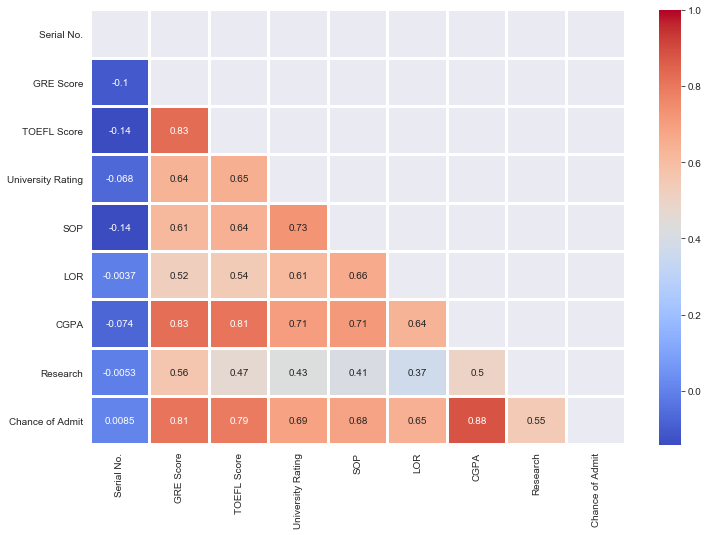

In [12]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cmap='coolwarm',linewidth=2,annot=True,mask=np.triu(df.corr()))

In [13]:
df['Chance of Admit bin']=df['Chance of Admit'].apply(lambda x:1 if x>0.80 else 0)

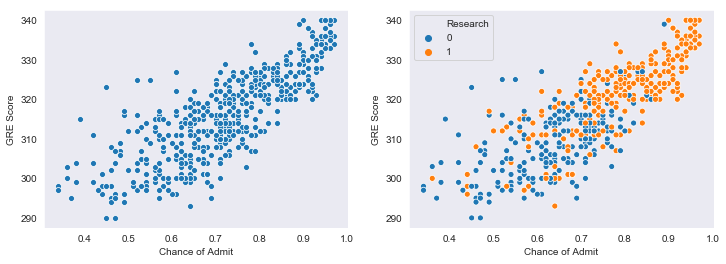

In [14]:
fig,ax=plt.subplots(1,2,figsize=(12,4))
sns.scatterplot(x='Chance of Admit',y='GRE Score',data=df,ax=ax[0])
sns.scatterplot(x='Chance of Admit',y='GRE Score',data=df,ax=ax[1],hue='Research')

C:\Users\Gwenn\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


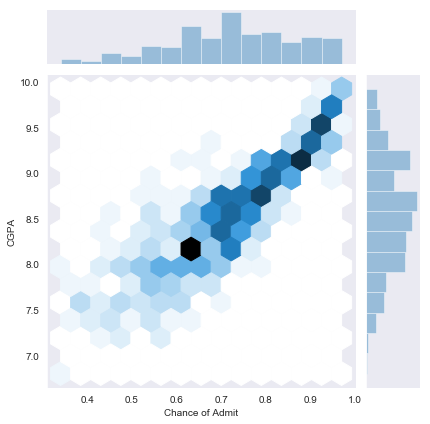

In [15]:
sns.jointplot(x='Chance of Admit',y='CGPA',data=df,kind='hex')

Text(0.5,1,'Worst,Average & Best SOP Performances')

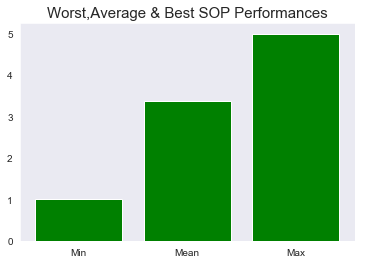

In [42]:
y=np.array([df['SOP'].min(),df['SOP'].mean(),df['SOP'].max()])
x=['Min','Mean','Max']
plt.bar(x,y,color='g')
plt.title('Worst,Average & Best SOP Performances',fontsize=15)



C:\Users\Gwenn\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


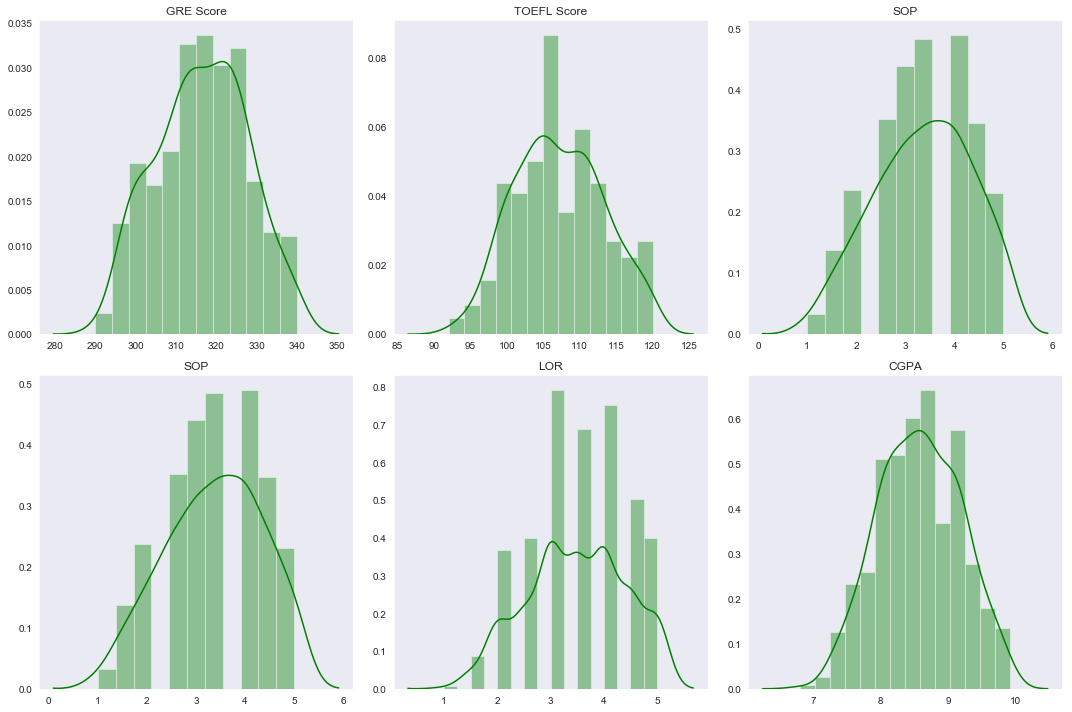

In [19]:
fig,ax=plt.subplots(2,3,figsize=(15,5))
count=0
for i in range(2):
    for j in range(3):
        s=colls[count+j]
        sns.distplot(df[s].values,ax=ax[i][j],color='g')
        ax[i][j].set_title(s,fontsize=12)
        fig=plt.gcf()
        fig.set_size_inches(15,10)
        plt.tight_layout()
    count=count+j+i

C:\Users\Gwenn\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


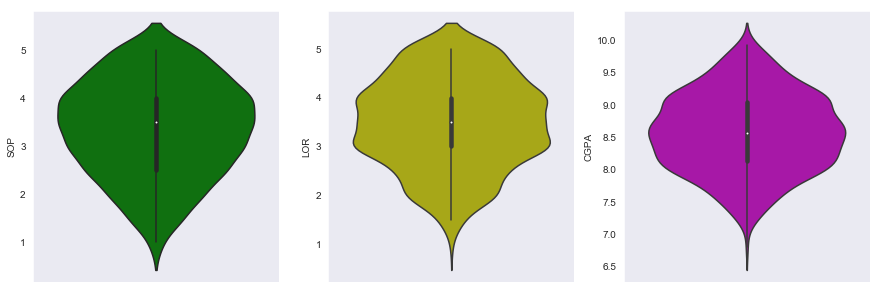

In [32]:
plt.figure(figsize=(15,5))
plt.subplot(131)
sns.violinplot(df['SOP'],orient='v',color='g')

plt.subplot(133)
sns.violinplot(df['CGPA'],orient='v',color='m')



plt.subplot(132)
sns.violinplot(df['LOR'],orient='v',color='y')

In [39]:
df.keys()

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit', 'Chance of Admit bin'],
      dtype='object')

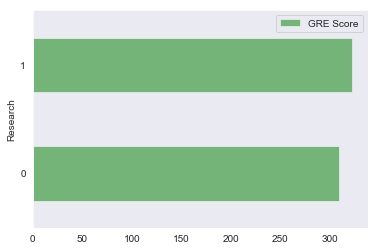

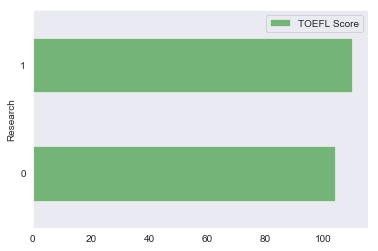

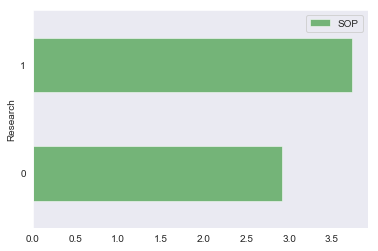

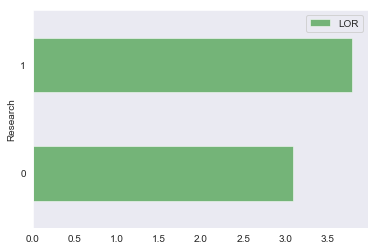

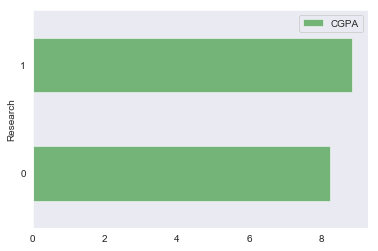

In [27]:
colls=['GRE Score', 'TOEFL Score', 'SOP','LOR', 'CGPA']
for col in colls:
    mean=pd.pivot_table(df,values=col,index='Research',aggfunc='mean')
    ax=mean.plot.barh(color='g',alpha=0.5)

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor 
from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler,Normalizer
from sklearn.pipeline import make_pipeline

In [47]:
df.keys()

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit', 'Chance of Admit bin'],
      dtype='object')

In [44]:
variables=['GRE Score', 'TOEFL Score', 'University Rating', 'SOP','LOR', 'CGPA', 'Research']
X=df[variables]
y=df['Chance of Admit']

In [56]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=5)

In [53]:
preproc=make_pipeline(StandardScaler(),Normalizer())

In [54]:
preproc.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('normalizer', Normalizer(copy=True, norm='l2'))])

In [57]:
preproc.fit_transform(X_train)
preproc.fit_transform(X_test)

array([[ 0.02131741, -0.29196842, -0.36592804, ..., -0.6495724 ,
        -0.27056731, -0.41172999],
       [-0.2013198 ,  0.1304422 , -0.46530348, ...,  0.31330178,
         0.40813981, -0.52354391],
       [ 0.44729431,  0.42645551, -0.36175344, ...,  0.24357866,
         0.00811091,  0.36581436],
       ...,
       [ 0.15867849, -0.35885644, -0.01168207, ..., -0.2477747 ,
        -0.70861705, -0.5060546 ],
       [ 0.04454456, -0.19786804, -0.01986073, ...,  0.04680474,
        -0.06810248,  0.77322167],
       [ 0.32500178,  0.30986041,  0.50521475, ...,  0.49877033,
         0.31358443,  0.26579886]])

In [58]:
linreg=LinearRegression()

In [63]:
linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [60]:
pred=linreg.predict(X_test)

In [69]:
from sklearn import metrics
from sklearn.metrics import r2_score,accuracy_score,mean_squared_error

In [72]:
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred)))
print('R2 Score:',metrics.r2_score(y_test,pred))

RMSE: 0.0596645289151771
R2 Score: 0.7748446611568136


In [74]:
tree=DecisionTreeRegressor()
tree.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [75]:
pred=tree.predict(X_test)

In [76]:
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred)))
print('R2 Score:',metrics.r2_score(y_test,pred))

RMSE: 0.09024780699089958
R2 Score: 0.4848625400573453


In [77]:
rfc=RandomForestRegressor(n_estimators=100)

In [78]:
rfc.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [79]:
pred=rfc.predict(X_test)

In [80]:
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred)))
print('R2 Score:',metrics.r2_score(y_test,pred))

RMSE: 0.06606703767134306
R2 Score: 0.7239298279642438


In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

In [102]:
X=df[variables]
y=df['Chance of Admit bin']

In [107]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=7)

In [108]:
logreg=LogisticRegression()

In [110]:
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [111]:
pred=logreg.predict(X_test)

In [112]:
from sklearn.metrics import classification_report,confusion_matrix

In [115]:
print('Classification Report:' '\n' '\n',metrics.classification_report(y_test,pred))
print('Confusion Matrix:' '\n' '\n',metrics.confusion_matrix(y_test,pred))

Classification Report:

              precision    recall  f1-score   support

          0       0.91      0.95      0.93       108
          1       0.86      0.76      0.81        42

avg / total       0.90      0.90      0.90       150

Confusion Matrix:

 [[103   5]
 [ 10  32]]


In [117]:
rfc=RandomForestClassifier(n_estimators=100)

In [118]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [119]:
pred=rfc.predict(X_test)

In [120]:
print('Classification Report:' '\n' '\n',metrics.classification_report(y_test,pred))
print('Confusion Matrix:' '\n' '\n',metrics.confusion_matrix(y_test,pred))

Classification Report:

              precision    recall  f1-score   support

          0       0.95      0.97      0.96       108
          1       0.92      0.86      0.89        42

avg / total       0.94      0.94      0.94       150

Confusion Matrix:

 [[105   3]
 [  6  36]]


In [121]:
tree=DecisionTreeClassifier()

In [122]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [123]:
pred=tree.predict(X_test)

In [124]:
print('Classification Report:' '\n' '\n',metrics.classification_report(y_test,pred))
print('Confusion Matrix:' '\n' '\n',metrics.confusion_matrix(y_test,pred)) 

Classification Report:

              precision    recall  f1-score   support

          0       0.95      0.93      0.94       108
          1       0.82      0.88      0.85        42

avg / total       0.92      0.91      0.91       150

Confusion Matrix:

 [[100   8]
 [  5  37]]
